## `Live Analysis Project`

### `Dataset Description`:

#### We are going to use a popular and versatile dataset for analysis called `Titanic: Machine Learning from Disaster` dataset. It provides demographic and passenger information from the Titanic, making it useful for a wide range of analyses

#### Here is a link to the [<span style="color:yellow">Dataset</span>](https://www.kaggle.com/datasets/emrullahdemirhan/titaniccsv?select=titanic.csv).

## Here are the steps we'll follow:

#### 1 .Load the data using `Pandas`.
#### 2 .Perform basic data `exploration` and `cleaning`.
#### 3 .Ask specific questions and `explore the data` to answer them.
#### 4 .Visualize the findings using `Matplotlib` and `Seaborn`.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the style
sns.set_theme(style="darkgrid")

### Step 1: Load the Data

In [21]:
# Load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Basic Data Exploration and Cleaning
First, we will take a look at the structure of the data, check for missing values, and get some basic statistics

In [16]:
#Get basic information about the dataset
#df.info()

#Check for missing values
df.isnull().sum()


# #Get summary statistics
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
#handle Missing Data
df=df.fillna({'Age':df['Age'].mean(),'Cabin': 'Unassigned' })

In [14]:
set(df['Cabin'])

{'A10',
 'A14',
 'A16',
 'A19',
 'A20',
 'A23',
 'A24',
 'A26',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'B101',
 'B102',
 'B18',
 'B19',
 'B20',
 'B22',
 'B28',
 'B3',
 'B30',
 'B35',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C106',
 'C110',
 'C111',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C30',
 'C32',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C52',
 'C54',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C99',
 'D',
 'D10 D12',
 'D11',
 'D15',
 'D17',
 'D19',
 'D20',
 'D21',
 'D26',
 'D28',
 'D30',
 'D33',
 'D35',
 'D36',
 'D37',
 'D45',
 'D46',
 'D47',
 'D48',
 'D49',
 'D50',
 'D56',
 'D6',
 'D7',
 'D9',
 'E10',
 'E101',
 'E12',
 

#### Step 3: Ask Questions and Explore the Data
Here are a few questions we can ask:

1. What was the survival rate for different passenger classes?
2. Did age affect the likelihood of survival?
3. Were there any gender differences in survival rates?
4. What is the correlation between fare and survival rate?
5. Did the embarkation point have any impact on survival rates?
6. What is the survival rate for passengers traveling alone vs. those traveling with family?
7. Was there any impact of the deck on survival rate?
8. What were the survival rates for different age groups across different classes?

#### `Question 1`: Survival Rate for Different Passenger Classes

In [17]:
# Calculate survival rate for each passenger class
survival_rate_by_class = df.groupby(['Pclass'])['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


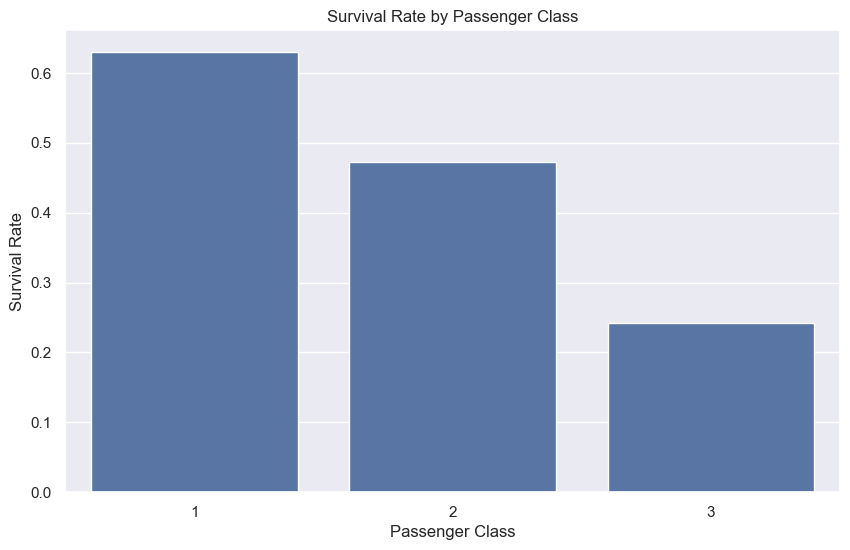

In [18]:
# Plot survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

#### `Question 2`: Effect of Age on Survival

In [24]:
# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


# Calculate survival rate for each age group
survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean()
print(survival_rate_by_age)

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\subhamoy\AppData\Local\Temp\ipykernel_29860\754696018.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean()


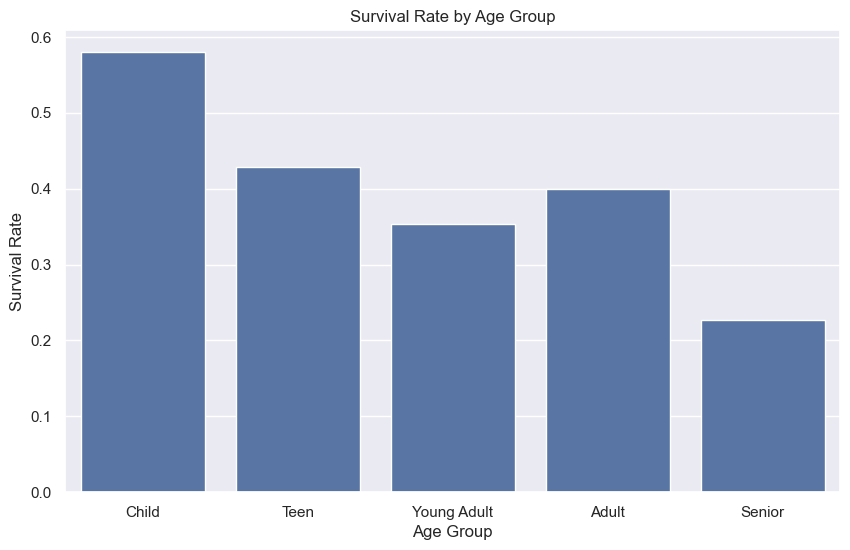

In [25]:
# Plot survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_age.index, y=survival_rate_by_age.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

#### `Question 3`: Gender Differences in Survival Rates


In [26]:
# Calculate survival rate by gender
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_rate_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


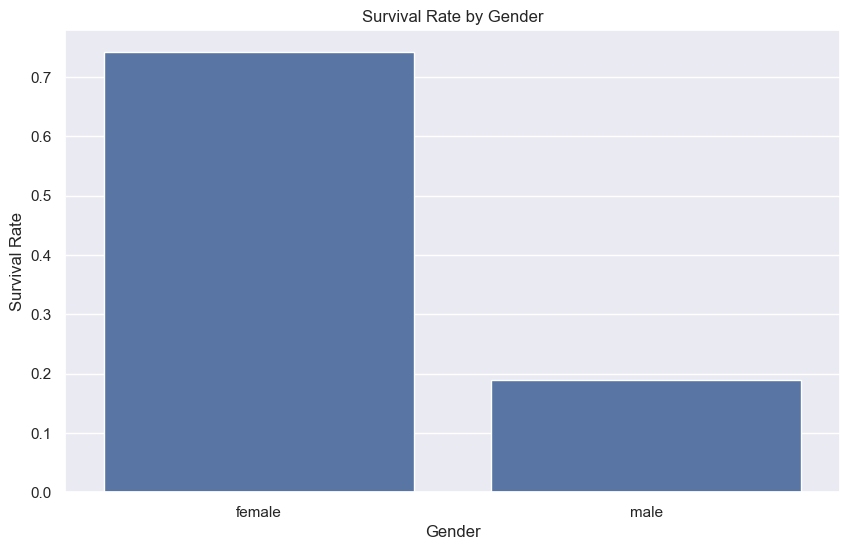

In [27]:
# Plot survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


#### `Question 4`: Correlation between Fare and Survival Rate

In [28]:
# Calculate the correlation between fare and survival
fare_survival_correlation = df['Fare'].corr(df['Survived'])
print(fare_survival_correlation)

0.2573065223849622


In [40]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df[['Fare', 'Survived']],annot=True,cmap='coolwarm')
# plt.show()

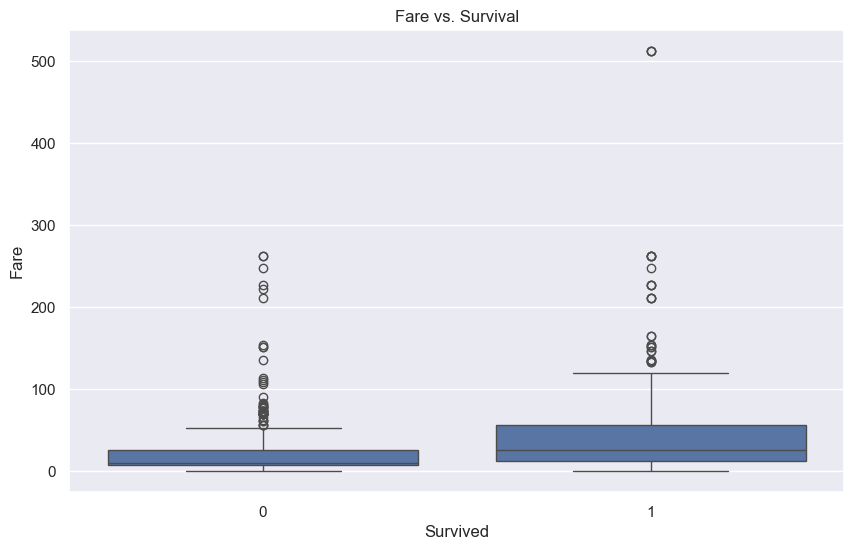

In [29]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

#### `Question 5`: Impact of Embarkation Point on Survival Rates

In [41]:
# Calculate survival rate by embarkation point
survival_rate_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_rate_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


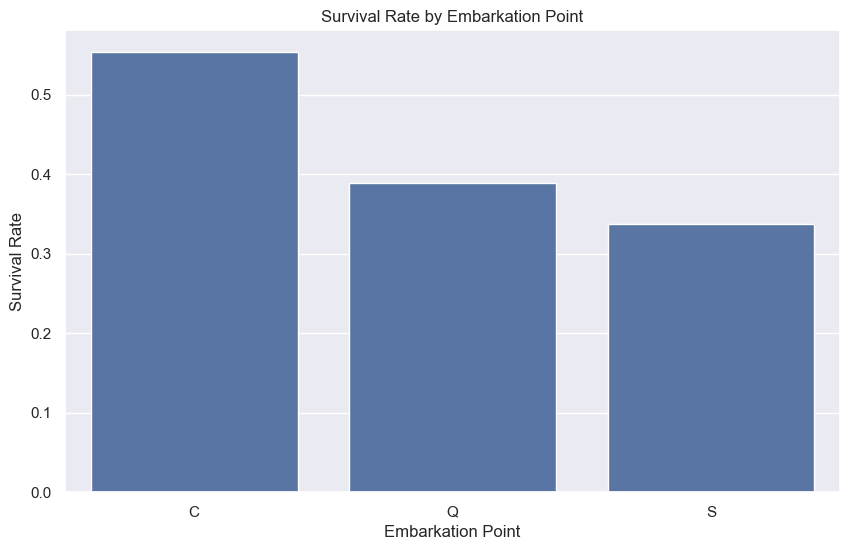

In [42]:

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_embarked.index, y=survival_rate_by_embarked.values)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

#### `Question 6`: Survival Rate for Passengers Traveling Alone vs. with Family
We can define passengers traveling alone as those with no siblings/spouses and no parents/children on board

In [46]:
df['Alone'] = (df['SibSp'] == 0) & (df['Parch'] == 0) #Logical AND

df.head()


# Calculate survival rate for passengers traveling alone vs. with family
survival_rate_alone = df.groupby('Alone')['Survived'].mean()
print(survival_rate_alone)

Alone
False    0.505650
True     0.303538
Name: Survived, dtype: float64


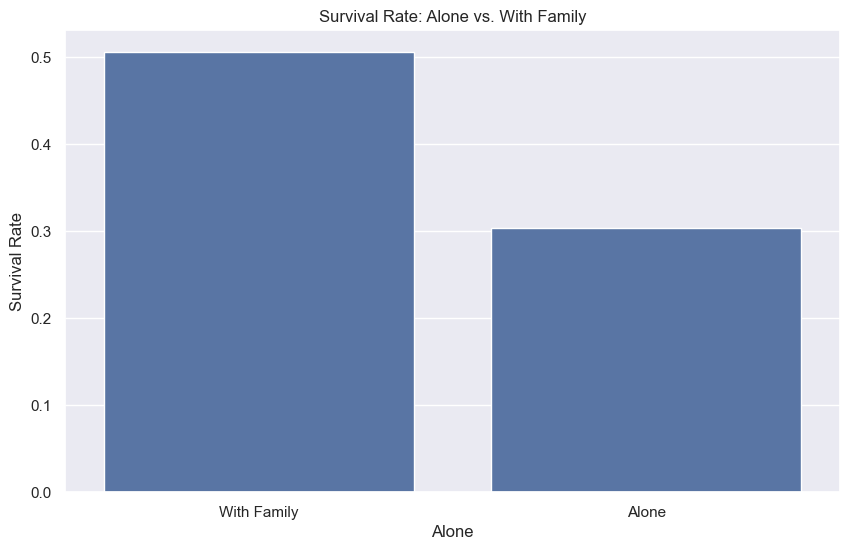

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_alone.index, y=survival_rate_alone.values)
plt.title('Survival Rate: Alone vs. With Family')
plt.xlabel('Alone')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.show()

#### `Question 7`: Impact of Deck on Survival Rate
First, we'll need to extract the deck information from the cabin number.

In [49]:
# Extract the deck information from the cabin number
df['Deck'] = df['Cabin'].str[0]



# Calculate survival rate by deck
survival_rate_by_deck = df.groupby('Deck')['Survived'].mean()
print(survival_rate_by_deck)

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64


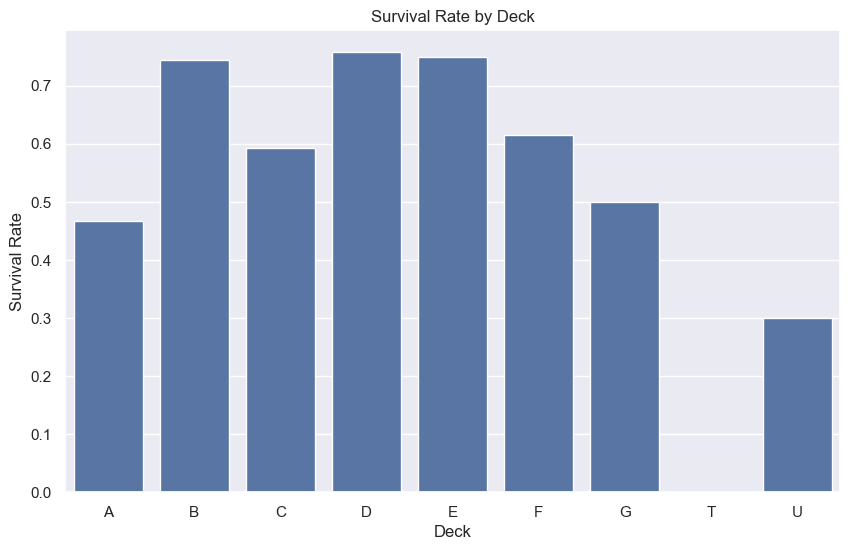

In [50]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_deck.index, y=survival_rate_by_deck.values)
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()


## Try it Yourself!

#### `Question 8`: Survival Rates for Different Age Groups Across Different Classes
